# Urban Observatory Newcastle University
- Author: Sedar Olmez
- Data source: http://newcastle.urbanobservatory.ac.uk/
- Description: Try downloading live sensory data from Newcastle to gain insight on the movement of people across the city. This will then be part of a pipeline system that inputs the data into an agent based model to simulate. 

In [1]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
import requests
import pandas as pd
import io

In [3]:
def GeoJSON(data={}, metadata={}):
    bundle = {
            'application/geo+json': data,
            'text/plain': '<IPython.display.GeoJSON object>'
    }
    metadata = {
        'application/geo+json': metadata
    }
    display(bundle, metadata=metadata, raw=True)

# Retrieve sensor information:

In [4]:
sensor_params = dict(
    sensor_type = 'Walking North'
)

r = requests.get('http://uoweb3.ncl.ac.uk/api/v1.1/sensors/csv/',sensor_params)

sensor_info = pd.read_csv(io.StringIO(r.text) )
sensor_info

,Sensor Name,Location (WKT),Ground Height Above Sea Level,Sensor Height Above Ground,Broker Name,Third Party,Sensor Centroid Longitude,Sensor Centroid Latitude
0,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,POINT (-1.61177165997381 54.9740544132907),43.389999,2.0,People Counting API,False,-1.611772,54.974054
1,PER_PEOPLE_NORTHUMERLAND_LINE_MID_DISTANCE_HEAD_0,POINT (-1.61187546061534 54.974385788398),43.849998,2.0,People Counting API,False,-1.611875,54.974386
2,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,POINT (-1.61182617919363 54.9741458764597),43.509998,2.0,People Counting API,False,-1.611826,54.974146
3,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,POINT (-1.61158161684422 54.9742039587214),43.480000,2.0,People Counting API,False,-1.611582,54.974204
4,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,POINT (-1.61149967779594 54.9741066654557),43.290001,2.0,People Counting API,False,-1.611500,54.974107
5,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,POINT (-1.61159110417673 54.9742892668984),43.610001,2.0,People Counting API,False,-1.611591,54.974289
6,PER_PEOPLE_NORTHUMERLAND_LINE_LONG_DISTANCE_HE...,POINT (-1.61221107799805 54.9748085841739),44.549999,2.0,People Counting API,False,-1.612211,54.974809
7,PER_PEOPLE_NORTHUMERLAND_LINE_LONG_DISTANCE_HE...,POINT (-1.61208941972901 54.9748314715766),44.639999,2.0,People Counting API,False,-1.612089,54.974831
8,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,POINT (-1.61191367348244 54.9742360249308),43.700001,2.0,People Counting API,False,-1.611914,54.974236


Now that we have all sensors of type Walking North. We can try get the data these sensors capture. 

In [5]:
# Time to plot the sensors on a map.
import smopy
import matplotlib.patheffects as pe

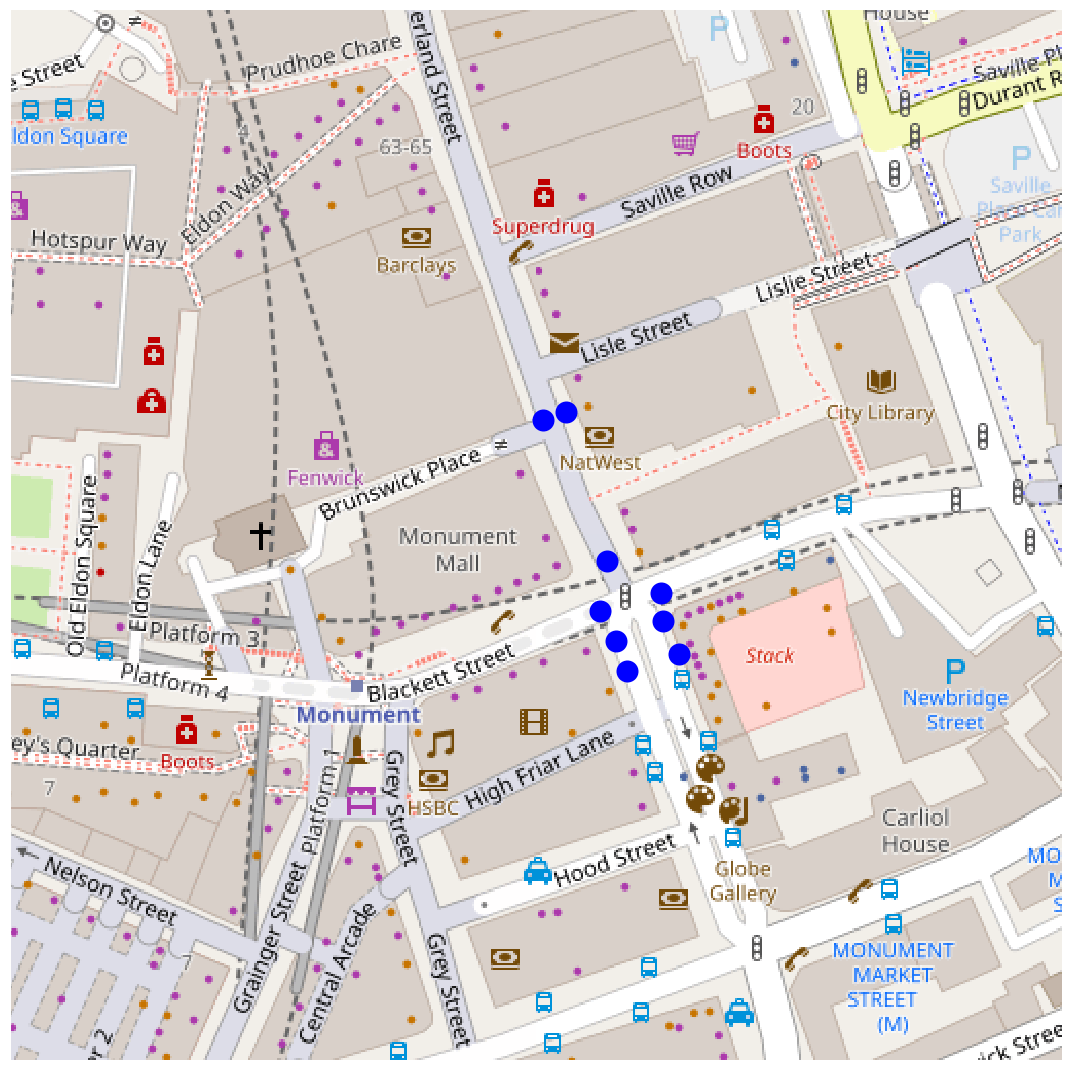

In [6]:
black_box = (
    min(sensor_info['Sensor Centroid Latitude']),
    min(sensor_info['Sensor Centroid Longitude']),
    max(sensor_info['Sensor Centroid Latitude']),
    max(sensor_info['Sensor Centroid Longitude']),
)

map = smopy.Map(black_box, z = 17)
ax = map.show_mpl(figsize=(15, 15))

for i, row in sensor_info.iterrows():
    x, y = map.to_pixels(row['Sensor Centroid Latitude'], row['Sensor Centroid Longitude'])
    ax.plot(x, y, 'ob', ms = 20, mew = 2);

# Setting up data parameters

In [7]:
import datetime

api_date_format = "%Y%m%d%H%M%S"

start_time = datetime.datetime(2019, 9, 17, 0)
end_time = datetime.datetime(2019, 9, 18)

data_parameters = dict(
    data_variable = 'Walking North',
    agg_method = 'median',
    agg_period = '15mins',
    starttime = start_time.strftime(api_date_format),
    endtime = end_time.strftime(api_date_format)
)

data_parameters.update(sensor_params)
data_parameters

{'agg_method': 'median',
 'agg_period': '15mins',
 'data_variable': 'Walking North',
 'endtime': '20190918000000',
 'sensor_type': 'Walking North',
 'starttime': '20190917000000'}

**Get aggregated data**

In [8]:
r = requests.get('http://uoweb3.ncl.ac.uk/api/v1.1/sensors/data/agg/csv/',data_parameters)
r

<Response [200]>

**Read the data into a dataframe**

In [9]:
pedestrian_step_count_data = pd.read_csv(io.StringIO(r.text))
pedestrian_step_count_data.head(10)

,Sensor Name,Variable,Units,Timestamp,Value,Flagged as Suspect Reading,Aggregated Method,Number of records,Location (WKT),Ground Height Above Sea Level,Sensor Height Above Ground,Broker Name,Third Party,Sensor Centroid Longitude,Sensor Centroid Latitude
0,PER_PEOPLE_NORTHUMERLAND_LINE_LONG_DISTANCE_HE...,Walking North,People,2019-09-17 00:00:00,2.0,False,Median,2,POINT (-1.61221107799805 54.9748085841739),44.549999,2.0,People Counting API,False,-1.612211,54.974809
1,PER_PEOPLE_NORTHUMERLAND_LINE_MID_DISTANCE_HEAD_0,Walking North,People,2019-09-17 00:00:00,11.0,False,Median,2,POINT (-1.61187546061534 54.974385788398),43.849998,2.0,People Counting API,False,-1.611875,54.974386
2,PER_PEOPLE_NORTHUMERLAND_LINE_LONG_DISTANCE_HE...,Walking North,People,2019-09-17 00:00:00,7.5,False,Median,2,POINT (-1.61208941972901 54.9748314715766),44.639999,2.0,People Counting API,False,-1.612089,54.974831
3,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,Walking North,People,2019-09-17 00:00:00,0.0,False,Median,2,POINT (-1.61149967779594 54.9741066654557),43.290001,2.0,People Counting API,False,-1.611500,54.974107
4,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,Walking North,People,2019-09-17 00:00:00,1.0,False,Median,2,POINT (-1.61177165997381 54.9740544132907),43.389999,2.0,People Counting API,False,-1.611772,54.974054
5,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,Walking North,People,2019-09-17 00:00:00,0.5,False,Median,2,POINT (-1.61182617919363 54.9741458764597),43.509998,2.0,People Counting API,False,-1.611826,54.974146
6,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,Walking North,People,2019-09-17 00:00:00,0.0,False,Median,2,POINT (-1.61159110417673 54.9742892668984),43.610001,2.0,People Counting API,False,-1.611591,54.974289
7,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,Walking North,People,2019-09-17 00:00:00,0.0,False,Median,2,POINT (-1.61191367348244 54.9742360249308),43.700001,2.0,People Counting API,False,-1.611914,54.974236
8,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,Walking North,People,2019-09-17 00:00:00,0.0,False,Median,2,POINT (-1.61158161684422 54.9742039587214),43.480000,2.0,People Counting API,False,-1.611582,54.974204
9,PER_PEOPLE_NORTHUMERLAND_LINE_SHORT_DISTANCE_H...,Walking North,People,2019-09-17 00:15:00,0.0,False,Median,3,POINT (-1.61177165997381 54.9740544132907),43.389999,2.0,People Counting API,False,-1.611772,54.974054


**Plotting the data**

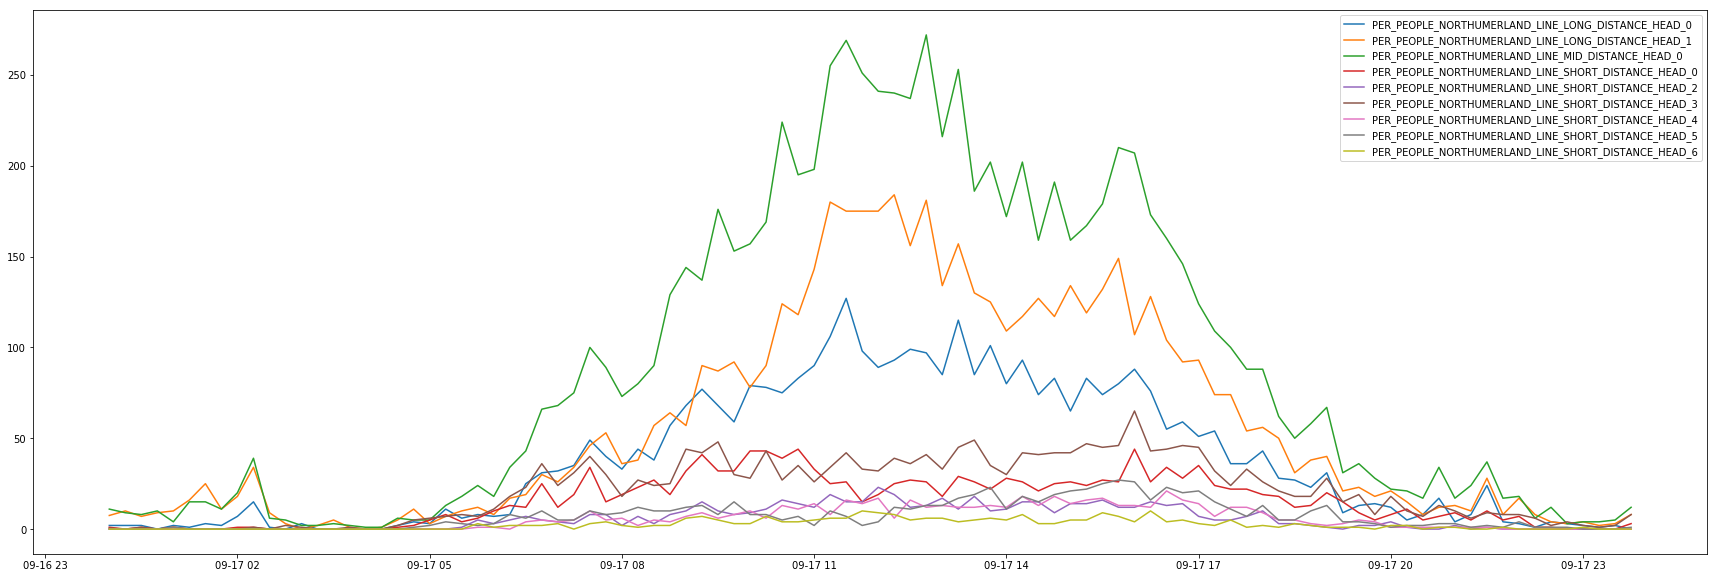

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 10))
for sensor_name, sensor_data in pedestrian_step_count_data.groupby('Sensor Name'):
    
    datetimes = pd.to_datetime(sensor_data['Timestamp'])
    plt.plot(datetimes, sensor_data['Value'], label = sensor_name)

    plt.legend()

**Plot of median**

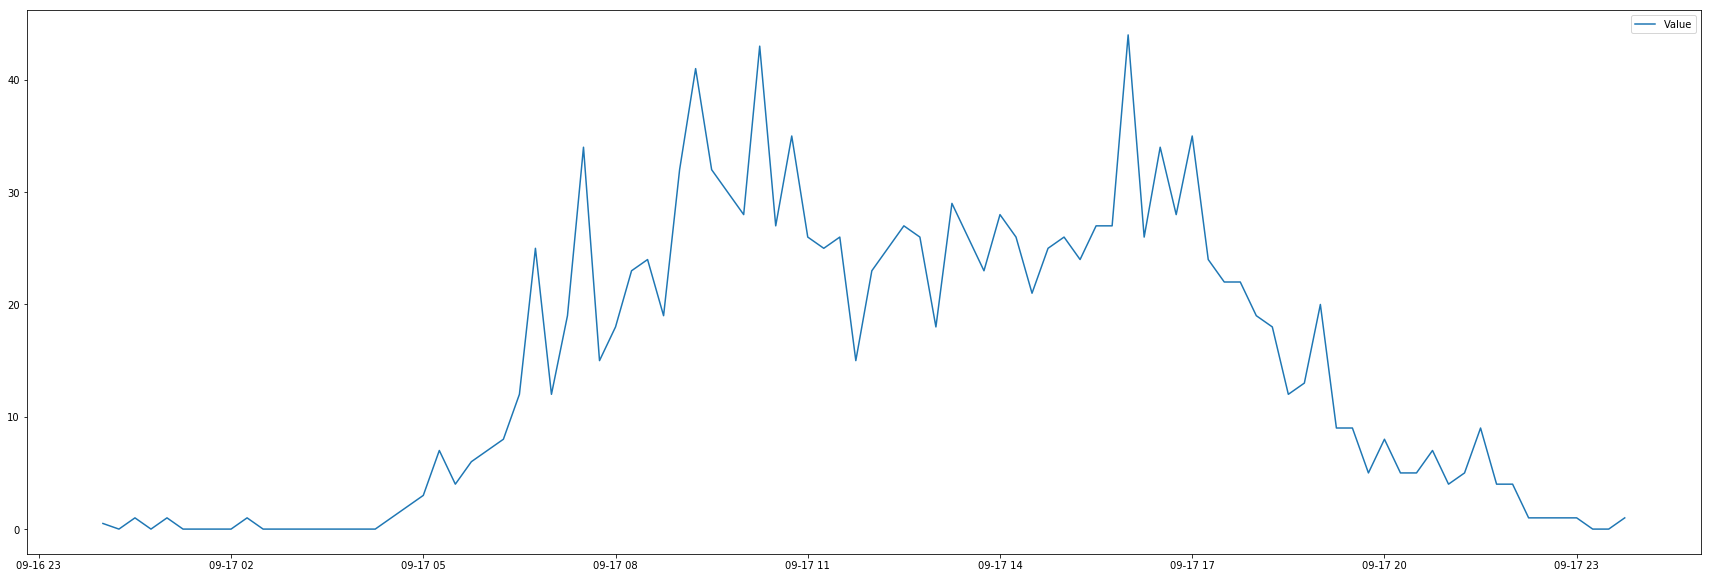

In [11]:
footfall_data_median = pedestrian_step_count_data.copy()
footfall_data_median.index = pd.to_datetime(footfall_data_median['Timestamp'])
footfall_data_median = footfall_data_median.resample('900s').median()

fig, ax = plt.subplots(figsize=(30,10))

plt.plot(footfall_data_median.index,footfall_data_median['Value'])

plt.legend()

**Clock plot of median**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import math

96


AttributeError: Unknown property labels

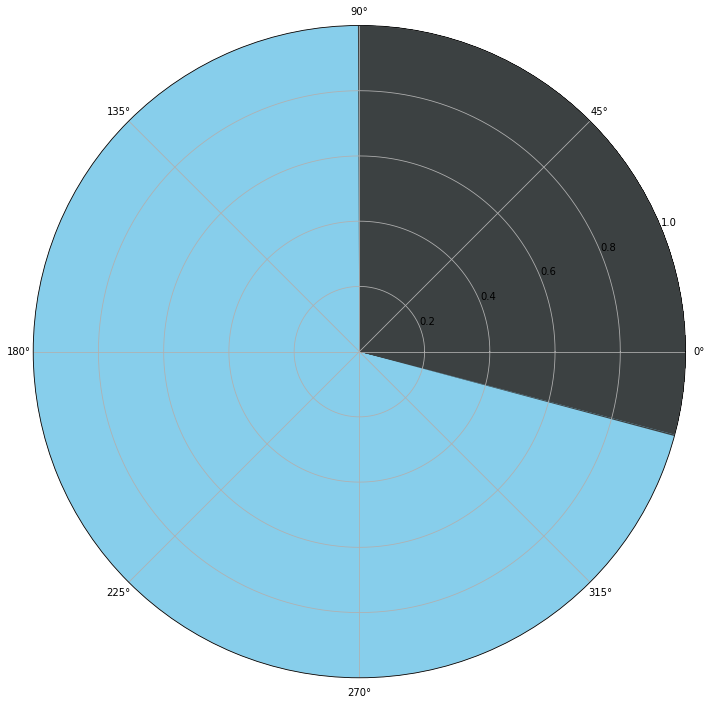

In [22]:
idx = pd.date_range(start_time, end_time - datetime.timedelta(minutes = 15), freq = '900s')

min_footfall_count,max_footfall_count = min(footfall_data_median['Value']),max(footfall_data_median['Value'])

foot_y_max = math.ceil(max_footfall_count/25)*25

normed = footfall_data_median['Value']

normed = normed/foot_y_max
max_normed = max(normed)
normed = normed.reindex(idx, fill_value=None)
normed = normed.where((pd.notnull(normed)), None)
print(len(normed))


N = len(normed)
bottom = 2
max_height = 6

theta = (np.linspace(0.0, 2 * np.pi, N, endpoint=False) + (2 * np.pi/N)/2) + np.pi/2

radii = max_height*normed[::-1]
width = (2*np.pi) / N
plt.figure(figsize=(12,12))
ax = plt.subplot(111, polar=True)
ax.set_facecolor('skyblue')
clock_ticks = list(range(23,2,-1) )+[2,1]
clock_ticks = ['0',] + clock_ticks 
clock_ticks = clock_ticks[18:] + clock_ticks[:-6]


minute_d = 2 * np.pi / (24*60)

sunrise = datetime.datetime(2019,9,17,7,0)


sunset = datetime.datetime(2019,9,17,16,24)
minutes_dark = int((datetime.datetime(2019,9,6) - sunset).total_seconds()/60)


for i in range(int(minutes_dark/4)):
    minute_start = sunset_start    
    plt.axvspan((minute_d*(i))+ np.pi/2,(minute_d*((i*4)+1))+ np.pi/2, facecolor='#3c4142', alpha=1,ymax=1.1, lw=2)


morning_dark = int((sunrise - datetime.datetime(2019,9,17)).total_seconds()/60)


for i in range(int(morning_dark/4)+1):
    plt.axvspan(2 * np.pi - minute_d*(morning_dark-i)+ np.pi/2,2 * np.pi -minute_d*(morning_dark-((i*4)+1))+ np.pi/2,ymax=1.1, facecolor='#3c4142', alpha=1, lw=2)
    

plt.xticks(ticks=(np.pi/180. * np.linspace(0,  360, 24, endpoint=False)),
           labels=clock_ticks)



bars = ax.bar(theta, radii, width=width, bottom=bottom)

defra = bottom+(((25)/(max_footfall_count))*max_height)

y_ticks = [0,bottom,defra,8]

for i in range(720):
    
    plt.hlines(defra,(i*2)*minute_d,((i*2)+1)*minute_d, color='blue', linestyle='-',lw=2)

    
cmap = plt.get_cmap('autumn_r')
for bar in bars:
    bar.set_color(cmap(bar.get_height()/(max_normed* max_height)))
plt.title('Walking North 17/09/2019')
plt.yticks(ticks=y_ticks,labels=[None,'0ugm-3','25ugm-3\n (Defra annual mean limit)',str(foot_y_max)+'ugm-3'],color='black',path_effects=[pe.withStroke(linewidth=4, foreground="white")])
plt.ylim((0,8))

plt.show()


